In [1]:
# import dependencies
# tensorFlow and tf.keras
import tensorflow as tf

# helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [2]:
# load dataset (Fashion MNIST)
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
# class names of labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
# checking the train images dataset shape
train_images.shape

(60000, 28, 28)

In [7]:
# checking length of train_labels (1 for eacg image)
len(train_labels)

60000

In [8]:
# checking the train labels (zero indexed correspond to class_names)
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
# checking the test images dataset shape
test_images.shape

(10000, 28, 28)

In [10]:
# checking length of test_labels
len(test_labels)

10000

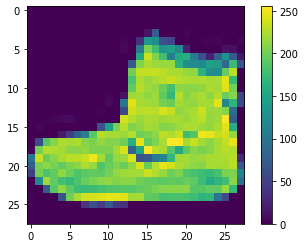

In [11]:
# visualizing the 1st train image
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
# preprocessing the training + testing images (normalize to 0-1.0)
train_images = train_images / 255.0

test_images = test_images / 255.0

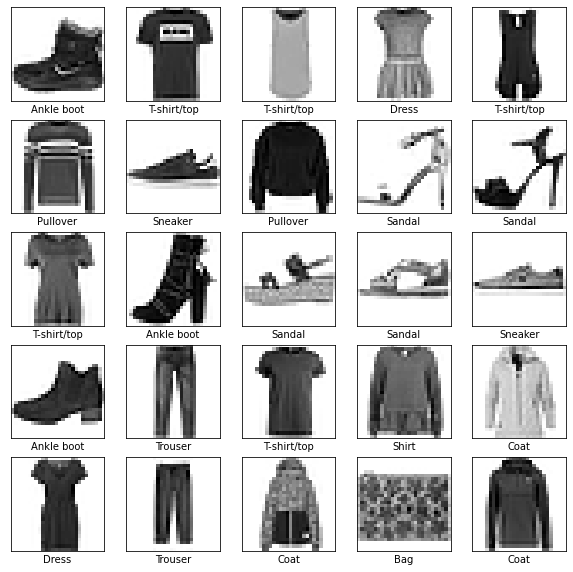

In [13]:
# checking the processed images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [14]:
# building model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),    # transform 2d input img into 1d (28*28 -> 784)
    tf.keras.layers.Dense(128, activation='relu'),    # Dense / FC layers
    tf.keras.layers.Dense(10)    # returns logits
])

In [16]:
# compile model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

"""
Loss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
Optimizer —This is how the model is updated based on the data it sees and its loss function.
Metrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.
"""

'\nLoss function —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.\nOptimizer —This is how the model is updated based on the data it sees and its loss function.\nMetrics —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.\n'

In [17]:
# train the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 864us/step - loss: 0.4981 - accuracy: 0.8246
Epoch 2/10
1875/1875 [==============================] - 2s 889us/step - loss: 0.3758 - accuracy: 0.8652
Epoch 3/10
1875/1875 [==============================] - 2s 916us/step - loss: 0.3348 - accuracy: 0.8789
Epoch 4/10
1875/1875 [==============================] - 2s 894us/step - loss: 0.3123 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 2s 929us/step - loss: 0.2926 - accuracy: 0.8928
Epoch 6/10
1875/1875 [==============================] - 2s 897us/step - loss: 0.2793 - accuracy: 0.8962
Epoch 7/10
1875/1875 [==============================] - 2s 871us/step - loss: 0.2662 - accuracy: 0.9015
Epoch 8/10
1875/1875 [==============================] - ETA: 0s - loss: 0.2554 - accuracy: 0.9046 ETA:  - 2s 873us/step - loss: 0.2553 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 2s 959us/step - loss: 0.2439 - accuracy: 0.9086
Epoch 10/10
18

In [18]:
# eval the trained model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)    

# train accuracy > test accuracy ; representing some overfitting (to training dataset)

313/313 - 0s - loss: 0.3223 - accuracy: 0.8870

Test accuracy: 0.8870000243186951


In [19]:
# add softmax layer on top of trained model (returning logits to returning proobabilites)
# softmax layer return probabilities SUM to 1.0 across all classes; sigmoid returns probabiliity 0 - 1.0 for each class
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [21]:
# make predictions
predictions = probability_model.predict(test_images)

In [22]:
# checking the prediction probabilities of the 1st test image
predictions[0]

array([6.9487965e-07, 3.8758547e-09, 5.4214105e-10, 6.8666580e-08,
       2.5066353e-08, 1.5206196e-04, 9.6866060e-08, 2.4158869e-02,
       1.0061686e-07, 9.7568810e-01], dtype=float32)

In [23]:
# obtaining the index (0-indexing) of the highest predicted probabilities
np.argmax(predictions[0])

9

In [24]:
# test label of the 1st image
test_labels[0]

9

In [25]:
# visualization functions
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

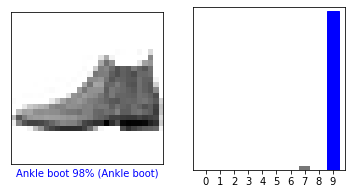

In [26]:
# visualizing the 1st image predictions

# index of test image to vizualize
i = 0

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

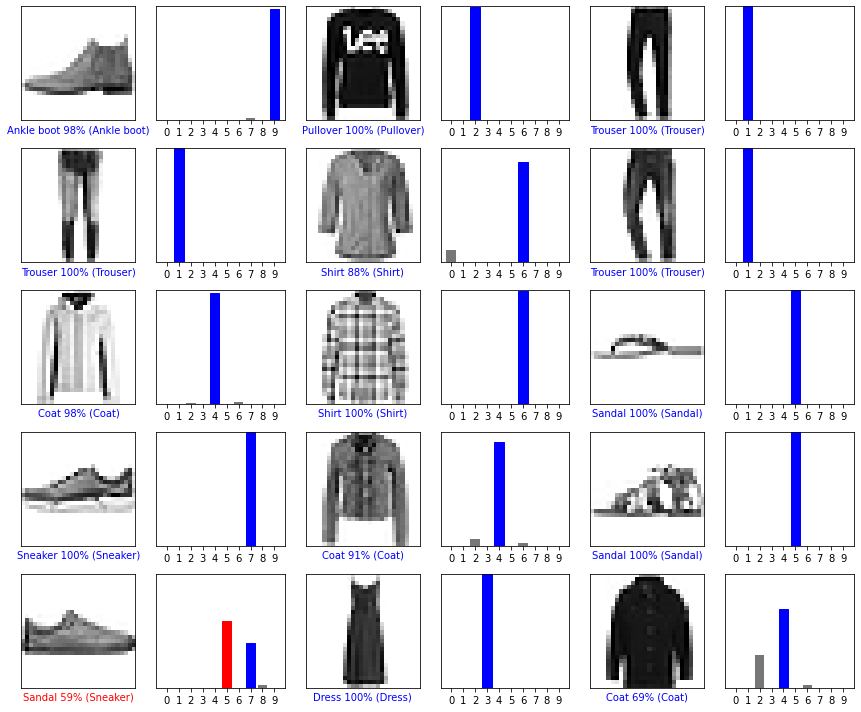

In [27]:
# vizualization

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [28]:
# using the trained model for prediction (single / multiple images)

# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [29]:
# expand dimension of image to be part of a batch
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [30]:
# predict using trained model
predictions_single = probability_model.predict(img)

print(predictions_single)

[[2.7559438e-06 2.6658187e-13 9.9860436e-01 3.3240282e-11 1.0859246e-03
  1.6659865e-15 3.0694529e-04 1.5325949e-17 2.0958674e-10 6.3454540e-17]]


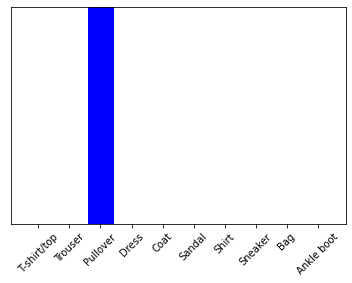

In [31]:
# visualizing the retuned probabilities
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [32]:
# obtaining index of the best prediction 
np.argmax(predictions_single[0])

2